<a href="https://colab.research.google.com/github/fsandre/claws_notebooks/blob/master/Getting_closer_to_the_flight_dynamics_by_using_the_linear_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting closer to the flight dynamics by using the linear representation

If we think about the common design techniques applied to flight control, we will notice that most of them start from a linearized plant model. Certainly the linear models rise as an intrinsical part of the mathematical framework required by these techniques ([MAGNI, 1997](https://www.semanticscholar.org/paper/Robust-flight-control-%3A-a-design-challenge-Magni-Bennani/7c9aaeed83d2cb44e0f5d7ab37e413ff0e07bfe1)), but such models may provide useful insights about the dynamics of the flying machines and, at least, give us a first glance of the size of the control problem that we are supposed to solve as control designers.

In the early ages of the flight stability and control history (beginning of 19th century), solving numerically the equations of motion with the full 6 degrees-of-freedom (DoF) was not at all just a matter of a fraction of seconds as it is today. Such that many studies were performed using linear algebraic formulations derived from the nonlinear equations under the assumption of small-perturbation with respect to a "steady-state" flight condition ([STEVENS & LEWIS, 2003](https://www.semanticscholar.org/paper/Aircraft-Control-and-Simulation-Stevens-Lewis/c03ecc07b6ae40e0a0b5ec27bb7a65b4da1d5ebc)). The close relations between these linear models and the aerodynamic stability derivatives, allows us, for example, to assess how much each of these derivatives are affecting the aircraft dynamic. Also, by estimating the aerodynamic derivatives (using theoretical data) we are able to study the aircraft stability even prior to the availability of the nonlinear aerodynamic data.

Nowadays, from a complete 6 DoF nonlinear flight model, it is possible to obtain a linearization from a steady-state flight condition in less than a second (you can try it using [this F-16 model](https://github.com/fsandre/mcflight/blob/master/scripts/controls/nz/lin_vs_nonlin_comparison.sce)) but this should not lead us to an "excessive empirical approach" as stated by Duane McRuer (1973) in the preface of his book *Aircraft Dynamics and Automatic Control*, from 46 years ago but still impressively applicable to our current times: "as a consequence, the analyst's physical means now often exceed his mental grasp; what he can compute may, possibly, far exceed his understanding or appreciation". 

From this inspiration, this article aims to show that the linear models importance may go beyond a simple utilisation as input for a massive gains calculation algorithm. Starting by a conceptual understanding of the linearization process, we use the state-space representation to illustrate some fundamentals of the flight dynamics (longitudinal), and afterwards we present a link between the linear models (numerically generated) and the aerodynamic derivatives in the algebraic form of the linear equations. 

# Linearization

We rely on the rich literature available about the mathematical process of the linearization of a dynamic systems ([VEGTE, 1986](https://www.semanticscholar.org/paper/Feedback-Control-Systems-Vegte/d35f7a2c6d38774a65f066c6a5241a50172d184e)) and even specifically of flight dynamic systems ([STEVENS & LEWIS, 2003](https://www.semanticscholar.org/paper/Aircraft-Control-and-Simulation-Stevens-Lewis/c03ecc07b6ae40e0a0b5ec27bb7a65b4da1d5ebc)), such that we will focus on some very fundamental ideas behind.

Imagine that our hypothetical physical system (flight dynamics) is represented by a function $y=f(x)$ which for an aircraft will be certainly nonlinear. We can think that $x$ could represent some major player in the aerodynamics, like, for example, the angle-of-attack, but this is not crucial for our example now. Let us take a very simple nonlinear function in order to illustrate the linearization process: 

>$y=f(x)=x^2$

Let us see it graphically:

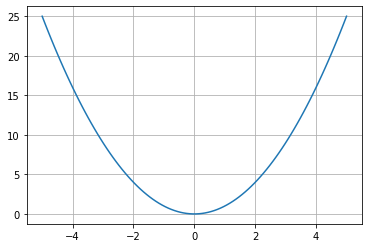

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5.0,5.0,num=100)
y = x**2
plt.plot(x,y,'-');
plt.grid();

Let us consider that, hypothetically, the point $(3,9)$ is a *steady-state* condition of our system and we are interested to study the behavior in the surrounding area of this point. Seduced by the idea of having a very simple linear function equivalent to our nonlinear function $f$, we build the function $g$ by using a first order [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) approximation (where $f'(x)=2x$ is the derivative of $f$):

> $g(x) = f(3) + \frac{f'(3)}{1!}(x-3)$

> $g(x) = 9 + 6(x-3) = 6x-9$

We can then visualize the functions altogether: 

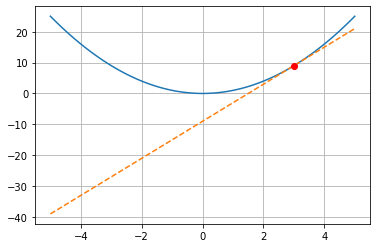

In [0]:
z = 6*x-9 # g function definition
fig2 = plt.figure() 
plt.plot(x,y,'-');
plt.plot(x,z,'--');
plt.plot((3.0,),(9.0,),'ro') # our "steady-state" point (3,9)
plt.grid()

Notice that nearby our "steady-state" point, the difference between the values of $f$ and $g$ is close to zero but it increases as we move away from $x=3$. For example:

> $g(3.1)=9.60$

> $f(3.1)=9.61$

but:

> $g(4.0)=15.0$

> $f(4.0)=16.0$

As introduced before there are several advantages in handling a linear function as $g$ instead of $f$, but we have to measure carefully the boundaries of the validity in our assumptions here. In our previous example, would it be acceptable an error of $0.01$ over $9.61$? What about $1.0$ over $16.0$?

In order to get a more concrete example, in the article [Aircraft Instantaneous Center of Rotation and Normal Acceleration Augmentation System](https://medium.com/@fsandre/aircraft-instantaneous-center-of-rotation-and-normal-acceleration-augmentation-system-4047cfd36ef6), this author used a linear model for his purposes and prior to his study, he compared the response of the linear model with the nonlinear model. From a steady-state condition of a straight level flight, for a deflection of 1 degree of elevator, after 1.9s, we have an error of about 1 deg/s over 9 deg/s for the pitch rate (whose trim condition was 0 deg/s). However, his analysis was concentrated in the first second of the simulation within which the matching between the models for the pitch rate had an error of less than 0.1 deg/s.

It is not always easy to define the boundaries of our linear models representativeness. Going back to our simple function $f(x)=x^2$, imagining that it represents the aircraft dynamic and that we have chosen some points to linearize and eventually design a controller for each of them, we could make the designed gains vary as a function of the flight condition $x$, which by itself could be function of the aerodynamic properties like Mach or the air speed. In this case, the choice of the points $x$ (and therefore the boundaries for each linear model) could take into account since the uncertainty of the sensors until the considered margins of a possible robust control design technique. 

Illustrating with curves, suppose that we chose the design points $x=-4$, $x=-2$, $x=0$, $x=2$ and $x=4$, our design would focus in the solid line picture showed in the plot below. We can see that this picture, built by the union of the linear approximations around the design points, resembles our original model (in dashed line). But as mentioned before, the accuracy of our linear representation shall be justified and verified and if it is not good enough for our purposes we could, for example, add more design points to linearize.

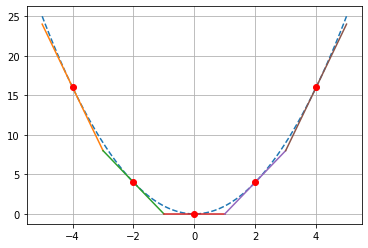

In [0]:
x_m4 = np.linspace(-5.0,-3.0,num=20)
y_m4 = -8*x_m4-16
x_m2 = np.linspace(-3.0,-1.0,num=20)
y_m2 = -4*x_m2-4
x_0 = np.linspace(-1.0,1.0,num=20)
y_0 = 0*x_0
x_2 = np.linspace(1.0,3.0,num=20)
y_2 = 4*x_2-4
x_4 = np.linspace(3.0,5.0,num=20)
y_4 = 8*x_4-16
fig2 = plt.figure() 
plt.plot(x,y,'--');
plt.plot(x_m4,y_m4,'-');
plt.plot(x_m2,y_m2,'-');
plt.plot(x_0,y_0,'-');
plt.plot(x_2,y_2,'-');
plt.plot(x_4,y_4,'-');
plt.plot((-4.0,-2.0,0.0,2.0,4.0),(16.0,4.0,0.0,4.0,16.0),'ro');
plt.grid()

# F-16 Longitudinal flight dynamics

For studying the linear behavior of a typical longitudinal flight dynamic, we will make use of the well known F-16 model presented by Stevens & Lewis (2003) and implemented by this author, whose code is fully available at GitHub in the project [McFlight](https://github.com/fsandre/mcflight).

Starting from the 6 DoF equations of motion, we have found a steady-state flight condition, around which we will perform the numerical linearization. This condition will be a straight level flight and if we think about developing an automatic flight control considering it, this roughly would mean that if the aircraft is disturbed by a gust, for example, it would pursue the "stable" condition which in this case would be the straight level flight. So let us setting up our steady-state flight condition, also known as trim condition. For convenience we will use a python dictionary to store the parameters values. Also, for each parameter identifier, we would put a suffix indicating the measurement unit of each variable. We are going to use the body reference frame, i.e., we will describe the airspeed as their components $u$, $v$ and $w$ in the body frame instead of airspeed $V$ and the angle-of-attack $\alpha$ as it would be in the stability reference frame (further details in the Chapter 2 of [Stevens & Lewis, 2003](#scrollTo=lk_JNsTMeJpu&line=15&uniqifier=1)).

In [0]:
# General parameters of the aircraft
f16 = {}
f16['wing_ft2'] = 300.0
f16['chord_ft'] = 11.32

# Specific parameters of the trim condition
f16_sl = {} # trim condition for F-16 straight level flight at sea level
f16_sl['alt_ft'] = 0.0  # altitude in feet
f16_sl['xcg'] = 0.35    # CG position in percentage of mean aerodynamic chord
f16_sl['VT_ftps'] = 502.0 # true airspeed in feet per second
f16_sl['u_ftps'] = 501.65813 # longitudinal component of speed in body axis
f16_sl['w_ftps'] = 18.523579 # longitudinal component of speed in body axis
f16_sl['theta_rad'] = 0.0369079 # theta in radians
f16_sl['throttle_u'] = 0.1385637 # throttle setting in unit (from 0 to 1)
f16_sl['elev_deg'] = -0.7587782 # elevator deflection in degrees
f16_sl['alpha_rad'] = np.arctan(f16_sl['w_ftps']/f16_sl['u_ftps'])
f16_sl['mass_slug'] = 636.94268; # aircraft mass
f16_sl['AYY_slugft2'] = 55814.0; # inertia moment
f16_sl['Q_lbfpft2'] = 299.50614; # dynamic pressure

As we mentioned before, we will use the state-space representation, such that our linear model will be represented by the following system of ordinary differential equations:

>$ \dot{\delta X}=A.\delta X+B.\delta u$

>$ \delta Y = C.\delta X+D.\delta u$

Notice that we preferred to use the state $X$ and the input $u$ prefixed by a $\delta$ to highlight that in our linear model, these variables will represent a variation related to the steady-state condition. This is important to remember when we intend to compare this model response with the nonlinear model response. These are our state ($X$), input ($u$) and output ($Y$) vectors respectively:



In [0]:
x_labels = ['u_ftps', # X component of airspeed 
            'w_ftps', # Z component of airspeed
            'theta_rad',  # pitch angle
            'q_rps' # pitch rate in radians per second
           ]
u_labels = ['throttle_u', # throttle in unit (0 to 1) 
            'elev_deg' # elevator deflection in degrees
           ]
y_labels = ['nx_g', # acceleration in body X axis in 'g'
            'ny_g', # acceleration in body Y axis in 'g'
            'nz_g', # acceleration in body Z axis in 'g'
            'alpha_deg', # angle-of-attack
            'q_rps', # pitch rate in radians per second
            'Q_lbfpft2', # dynamic pressure in pounds per square feet
            'mach', # Mach number
            'nzs_g' # load factor, i.e. vertical acceleration in the stability
                    # axis using the positive sense pointing upwards
           ];

Firstly, in this section, we will show the matrices of the state-space representation, obtained numerically from the nonlinear implementation of the F-16 model available at the [McFlight project](https://github.com/fsandre/mcflight).

In [0]:
# F-16 sea-level trimming state-space matrices in body frame reference
A_body = """
  -0.0205944   0.0544749  -32.149502  -17.34162  ;
  -0.0669801  -1.0114212  -1.1768488   454.03925 ;
   0.          0.          0.          1.        ;
   0.001169    0.0013724   0.0005279  -1.0763773 
"""
B_body = """
   26.151683   0.2129226 ;
   0.025857   -1.0944541 ;
   0.          0.        ;
   0.0004101  -0.1756041 
"""
C_body = """
  -0.0006421   0.0016951  -0.0000381   0.0367417 ;
   0.          0.          0.          0.        ;
   0.002342    0.0313607  -0.0002848   1.4802948 ;
  -0.0045577   0.1139753  -0.0000627  -0.0003423 ;
   0.          0.          0.          1.        ;
   1.214648    0.0570833  -0.0231385  -0.0973449 ;
   0.0008372   0.000034    0.0000025  -0.0000699 ;
   0.0022331   0.031387   -0.0003066   1.4805348 
"""
D_body = """
   0.8129204   0.0066221 ;
   0.          0.        ;
  -0.0007712   0.0339755 ;
  -0.0002763   0.0001229 ;
   0.          0.        ;
  -0.0804158   0.0737061 ;
  -0.0000779   0.0000935 ;
   0.0292322   0.0343372 
"""
f16_sl['A'] = np.matrix(A_body)
f16_sl['B'] = np.matrix(B_body)
f16_sl['C'] = np.matrix(C_body)
f16_sl['D'] = np.matrix(D_body)

Now we have all the data necessary for simulating our linear model. We will make use of the scipy packages for LTI (Linear Time Invariant) systems handling to solve the ordinary differencial equation problem shown before at the state-space representation formulation. Let us start simulating by a simple elevator deflection of 1 degree below the trim elevator (remember that the input, as well as the ouput, are delta over the trim condition) during 1 second and then back to zero for more 4 seconds.

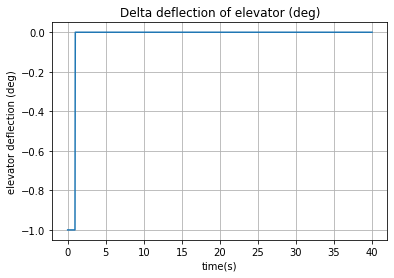

In [0]:
t_end = 40
t = np.linspace(0,t_end,num=1000)
u = np.ones_like(t)*(-1)
u[(int)(len(t)/t_end):] = 0.0
fig_u = plt.figure()
plt.title('Delta deflection of elevator (deg)')
plt.plot(t,u,'-')
plt.xlabel('time(s)')
plt.ylabel('elevator deflection (deg)')
plt.grid()

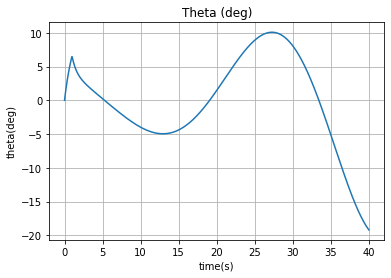

In [0]:
from scipy import signal

# Let us delete the throttle as an input for now 
# by cutting the last columns of B and D matrices
f16_sl_sys = signal.lti(f16_sl['A'],f16_sl['B'][:,1],f16_sl['C'],f16_sl['D'][:,1])
tout_f16_sl, f16_sl_y, f16_sl_x = signal.lsim(f16_sl_sys, u, t)
fig_theta = plt.figure()
plt.title('Theta (deg)')
plt.plot(t,f16_sl_x[:,3]*180.0/np.pi,'-')
plt.xlabel('time(s)')
plt.ylabel('theta(deg)')
plt.grid()

As expected, a negative deflection of elevator (clockwise rotation) decreases the lift in the horizontal and pitch up moment in the aircraft, increasing the theta value in bit more than 6 degrees as seen the plot above. After deflecting the elevator back to trim position (what is equivalent to apply 0 in our LTI system) at 1s, we can see the aircraft restoring the theta to the steady theta value but exciting a dynamic mode not damped and maybe not even stable. Let us take a look in the dynamic modes: 

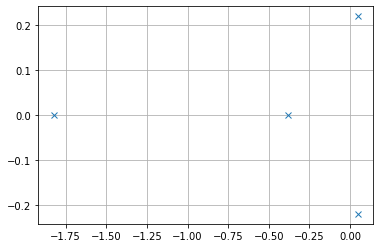

In [0]:
from scipy import linalg
f16_sl['modes'] = linalg.eig(f16_sl['A']);
fig_pz_1 = plt.figure();
plt.plot(f16_sl['modes'][0].real,f16_sl['modes'][0].imag,'x');
plt.grid()

We should expect the typical longitudinal dynamic modes: short period and phugoid, both complex and stable (left hand part of the complex plane). Instead, we have the so-called ***third oscillatory*** mode present in some most aft CG configurations of aircraft like figthers with high maneuverability requirements. This means that for this configuration the airplane is dynamically unstable.

However, if we take another linear model of the same flight condition, but for the CG at 30% of the mean aerodynamic chord, we will notice that the F-16 is stable for this configuration as shown below. 

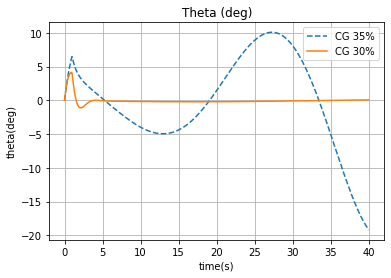

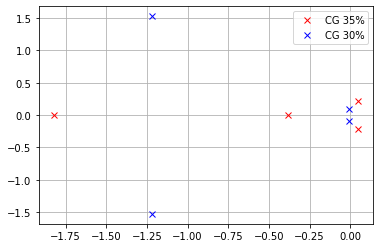

In [0]:
f16_sl_stable = {} # trim condition for F-16 straight level flight at sea level
f16_sl_stable['alt_ft'] = 0.0  # altitude in feet
f16_sl_stable['xcg'] = 0.30    # CG position in percentage of mean aerodynamic chord
f16_sl_stable['VT_ftps'] = 502.0 # true airspeed in feet per second
f16_sl_stable['u_ftps'] = 501.61112 # longitudinal component of speed in body axis
f16_sl_stable['w_ftps'] = 19.755675 # longitudinal component of speed in body axis
f16_sl_stable['theta_rad'] = 0.0369079 # theta in radians
f16_sl_stable['throttle_u'] = 0.1485169 # throttle setting in unit (from 0 to 1)
f16_sl_stable['elev_deg'] = -1.9305825 # elevator deflection in degrees
f16_sl_stable['alpha_rad'] = np.arctan(f16_sl_stable['w_ftps']/f16_sl_stable['u_ftps'])
f16_sl_stable['mass_slug'] = 636.94268; # aircraft mass
f16_sl_stable['AYY_slugft2'] = 55814.0; # inertia moment
f16_sl_stable['Q_lbfpft2'] = 299.50614; # dynamic pressure

# F-16 sea-level trimming state-space matrices in body frame reference
# for a stable CG configuration (cg = 0.3)
A_body = """
  -0.0174982   0.0537411  -32.145671  -18.524152;
  -0.0751808  -1.0484739  -1.2541416   453.86366;
   0.          0.          0.          1.       ;
   0.0005443  -0.0051875   0.0002044  -1.3858131
   """
B_body = """
  -0.0002159   0.2139285 ;
   0.0169823  -1.0382005 ;
   0.          0.        ;
  -0.000146   -0.1822076 
"""
C_body = """
   0.0022263   0.0324927  -0.0005005   1.4842479 ;
   0.          0.          0.          0.        ;
  -0.0005413   0.0016775  -0.0000191   0.0382701 ;
   1.0943232   0.1290306  -0.0445306  -0.0442394 ;
   0.0008299   0.0001374  -0.0000433  -0.000076  ;
   0.          0.          0.          1.        ;
  -0.0047524   0.1146606  -0.000345   -0.0004862 ;
   0.0019912  -0.7411807  -0.0005425   0.9461634 
"""
D_body = """
  -0.0005704   0.0322077 ;
   0.          0.        ;
  -0.0000028   0.0066475 ;
  -0.0601164  -0.1265468 ;
  -0.0000858  -0.0001237 ;
   0.          0.        ;
  -0.000384   -0.0003261 ;
  -0.0008051   0.0255343 
"""
f16_sl_stable['A'] = np.matrix(A_body)
f16_sl_stable['B'] = np.matrix(B_body)
f16_sl_stable['C'] = np.matrix(C_body)
f16_sl_stable['D'] = np.matrix(D_body)

# Let us delete the throttle as an input
f16_sl_stable_sys = signal.lti(f16_sl_stable['A'],f16_sl_stable['B'][:,1],
                        f16_sl_stable['C'],f16_sl_stable['D'][:,1])
tout_f16_sl_stable, f16_sl_stable_y, f16_sl_stable_x = signal.lsim(f16_sl_stable_sys, u, t)
fig_theta_stable = plt.figure()
plt.title('Theta (deg)')
plt.plot(t,f16_sl_x[:,3]*180.0/np.pi,'--',t,f16_sl_stable_x[:,3]*180.0/np.pi,'-')
plt.xlabel('time(s)')
plt.ylabel('theta(deg)')
plt.legend(('CG 35%','CG 30%',))
plt.grid()

f16_sl_stable['modes'] = linalg.eig(f16_sl_stable['A']);
fig_pz_2 = plt.figure();
plt.plot(f16_sl['modes'][0].real,f16_sl['modes'][0].imag,'rx',
         f16_sl_stable['modes'][0].real,f16_sl_stable['modes'][0].imag,'bx');
plt.legend(('CG 35%','CG 30%',))
plt.grid()

For the configuration of CG 30%, we can see that the input of elevator disturbes the theta value which is quickly settled to his equilibrium condition at zero. This is also confirmed by the plot of the dynamic modes: both phugoid and short period are stable.

If we compare the matrices A of the linearized configurations, we may notice that analyzing the numerical values, the highest differences are in the line corresponding to the pitch rate state ($q$), including a sign inversion in the element of the second column and fourth line. Would this be related to the static stability of the aircraft? In the next section, let us take a look in the algrebraic equations of the linear models and try to figure out if the aerodynamic derivatives in that line are affecting the static stability (and therefore the dynamic stability). 

In [0]:
print("F-16 state matrix for CG:",str(f16_sl['xcg']))
print(f16_sl['A'])
print("F-16 state matrix for CG:",str(f16_sl_stable['xcg']))
print(f16_sl_stable['A'])

F-16 state matrix for CG: 0.35
[[-2.0594400e-02  5.4474900e-02 -3.2149502e+01 -1.7341620e+01]
 [-6.6980100e-02 -1.0114212e+00 -1.1768488e+00  4.5403925e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 1.1690000e-03  1.3724000e-03  5.2790000e-04 -1.0763773e+00]]
F-16 state matrix for CG: 0.3
[[-1.7498200e-02  5.3741100e-02 -3.2145671e+01 -1.8524152e+01]
 [-7.5180800e-02 -1.0484739e+00 -1.2541416e+00  4.5386366e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 5.4430000e-04 -5.1875000e-03  2.0440000e-04 -1.3858131e+00]]


# Linear models by the algebraic equations

The algebraic equations for the linearization of the flight dynamics of a typical aircraft can be found in a rich literature on the topic. [COOK, 2007](https://www.elsevier.com/books/flight-dynamics-principles/cook/978-0-08-098242-7), presents an extensive list of these equations and their relation with the aerodynamic derivatives. We reproduce below the state-space representation equations given by COOK, 2007, but with a slightly different notation (for the dimensional derivatives, we have put the variable without a circle on top as used by COOK).

> $\dot{\delta X}=A.\delta X+B.\delta u$

where:

>$A=\begin{pmatrix}
x_u & x_w & x_\theta & x_q \\
z_u & z_w & z_\theta & z_q \\
0 & 0 & 0 & 1 \\
m_u & m_w & m_\theta & m_q \\
\end{pmatrix}$

>$B=\begin{pmatrix}
x_{\delta e} & x_{\delta t} \\
z_{\delta e} & z_{\delta t} \\
0 & 0 \\
m_{\delta e} & m_{\delta t}
\end{pmatrix}$

given the coefficient equations below:

> $x_u = \dfrac{X_u}{m}+\dfrac{X_{\dot{w}} Z_u}{m(m-Z_{\dot{w}})}$

> $z_u = \dfrac{Z_u}{m-Z_{\dot{w}}}$

> $m_u = \dfrac{M_u}{I_{yy}} + \dfrac{Z_u M_{\dot{w}}}{I_{yy}(m-Z_{\dot{w}})}$

> $x_w = \dfrac{X_w}{m}+\dfrac{X_{\dot{w}}Z_w}{m(m-Z_{\dot{w}})}$

> $z_w = \dfrac{Z_w}{m-Z_{\dot{w}}}$

> $m_w = \dfrac{M_w}{I_{yy}} + \dfrac{Z_w M_{\dot{w}}}{I_{yy}(m-Z_{\dot{w}})}$

> $x_q = \dfrac{X_q - mW_e}{m} + \dfrac{(Z_q+mU_e)X_{\dot{w}}}{m(m-Z_{\dot{w}})}$

> $z_q = \dfrac{(Z_q+mU_e)}{m-Z_{\dot{w}}}$

> $m_q = \dfrac{M_q}{I_{yy}} + \dfrac{(Z_q+mU_e)M_{\dot{w}}}{I_{yy}(m-Z_{\dot{w}})}$

> $x_\theta = -g \cos\theta_e-\dfrac{X_{\dot{w}}g\sin\theta_e}{m-Z_{\dot{w}}}$

> $z_\theta = -\dfrac{mg\sin\theta_e}{m-Z_\dot{w}}$

> $m_\theta = -\dfrac{M_{\dot{w}}.mg\sin\theta_e}{I_{yy}(m-Z_{\dot{w}})}$

and:

> $x_{\delta e} = \dfrac{X_{\delta e}}{m}+\dfrac{X_{\dot{w}}Z_{\delta e}}{m(m-Z_\dot{w})}$

> $z_{\delta e} = \dfrac{Z_{\delta e}}{m-Z_{\dot{w}}}$

> $m_{\delta e} = \dfrac{M_{\delta e}}{I_{yy}}+\dfrac{M_{\dot{w}} Z_{\delta e}}{I_{yy} (m-Z_{\dot{w}})}$

> $x_{\delta t} = \dfrac{X_{\delta t}}{m} + \dfrac{X_\dot{w} Z_{\delta t}}{m(m-Z_\dot{w})}$

> $z_{\delta t} = \dfrac{Z_{\delta t}}{m-Z_\dot{w}}$

> $m_{\delta t} = \dfrac{M_{\delta t}}{I_{yy}}+ \dfrac{M_{\dot{w}} Z_{\delta t}}{I_{yy}(m-Z_\dot{w})}$

$X_u$, $X_w$, $X_\dot{w}$, $Z_u$, $Z_w$, $Z_\dot{w}$, $M_u$, $M_w$, $M_\dot{w}$, $X_q$, $Z_q$, $M_q$ are the **dimensional** stability derivatives

$X_{\delta e}$, $Z_{\delta e}$, $M_{\delta e}$, $X_{\delta t}$, $Z_{\delta t}$, $M_{\delta t}$ are the **dimensional** control derivatives.

**Note**: We have to be careful about what each author considers in the equation of a dimensional derivative. Here we will use the way COOK (2007) defined. Although, McRUER (1973) prefers to divide the forces by the mass and the moments by the corresponding inertia moment in the dimensional derivative.

$U_e$: Equilibrium speed in the X axis of body reference frame

$W_e$: Equilibrium speed in the X axis of body reference frame

$\theta_e$: Equilibrium pitch angle

$m$: The aircraft mass

$I_{yy}$: inertia moment around lateral axis

$g$: acceleration of gravity

# Comparing the pitch stiffness by using the state matrix (A)

As we noticed in the previous section, the state matrix for the two flight conditions linearized for the F-16 are very similar except by the last line. For the element $m_w$ (check the equations in the last section) the difference includes even a sign inversion.

$A_{CG35}=\begin{pmatrix}
-2.0594400e-02 & 5.4474900e-02 & -3.2149502e+01 & -1.7341620e+01\\
-6.6980100e-02 & -1.0114212e+00 & -1.1768488e+00 &  4.5403925e+02\\
 0.0000000e+00 &  0.0000000e+00 &  0.0000000e+00 & 1.0000000e+00\\
 1.1690000e-03 &  1.3724000e-03 &  5.2790000e-04 & -1.0763773e+00
\end{pmatrix}$

$A_{CG30}=\begin{pmatrix}
-1.7498200e-02 & 5.3741100e-02 & -3.2145671e+01 & -1.8524152e+01\\
-7.5180800e-02 & -1.0484739e+00 & -1.2541416e+00 &  4.5386366e+02\\
 0.0000000e+00 & 0.0000000e+00 &  0.0000000e+00 &  1.0000000e+00\\
 5.4430000e-04 & -5.1875000e-03 &  2.0440000e-04 & -1.3858131e+00
\end{pmatrix}$

We know that:

$m_w = \dfrac{M_w}{I_{yy}} + \dfrac{Z_w M_{\dot{w}}}{I_{yy}(m-Z_{\dot{w}})} =  \dfrac{M_w}{I_{yy}} + \dfrac{z_w M_{\dot{w}}}{I_{yy}}$

and then:

$M_w = m_w I_{yy}-z_w M_{\dot{w}}$

We also know that the dimensional derivative $M_w$ is related to the pitch stiffness derivative ($C_{m_\alpha}$), which plays an important role in pitch static stability, such that we can re-write the previous equation as:

$M_w = \dfrac{QSc}{V_{T_e}}C_{m_\alpha} = m_w I_{yy}-z_w M_{\dot{w}}$

and finally:

$C_{m_\alpha} = \dfrac{V_{T_e}}{QSc}\left(m_w I_{yy}-z_w M_{\dot{w}}\right)$

where:

$C_{m_\alpha}$: derivative of pitch moment related to alpha

$I_{yy}$: Inertia moment around lateral axis

$V_{T_e}$: Equilibrium air speed

$Q$: Dynamic pressure

$S$: Wing area

$c$: Mean aerodynamic chord

The only missing value in this last equation is the dynamic derivative $M_{\dot{w}}$, which, according to McRUER, 1973, plays an important role in the damping of the pitch modes. We can calculate its value using the matrix elements $z_\theta$ and $m_\theta$ as shown below:

> $m_\theta = -\dfrac{M_{\dot{w}}.mg\sin\theta_e}{I_{yy}(m-Z_{\dot{w}})} =
              \dfrac{M_{\dot{w}}}{I_{yy}}.z_\theta$

> $M_{\dot{w}} = \dfrac{I_{yy} m_\theta}{z_\theta}$


We are finally ready to calculate the $C_{m_\alpha}$ for each flight condition, using the above equations for the $C_{m_\alpha}$ itself and for $M_\dot{w}$.

In [0]:
def Cmalpha(aircraft, flight_condition):
  Iyy = flight_condition['AYY_slugft2']
  VTe = flight_condition['VT_ftps']
  Q = flight_condition['Q_lbfpft2']
  S = aircraft['wing_ft2']
  c = aircraft['chord_ft']
  mw = flight_condition['A'][3,1]
  zw = flight_condition['A'][1,1]
  Mwdot = Iyy*flight_condition['A'][3,2]/flight_condition['A'][1,2]
  return VTe/(Q*S*c)*(mw*Iyy-zw*Mwdot)

print("CMalpha for CG 35: ",Cmalpha(f16, f16_sl))
print("CMalpha for CG 30: ",Cmalpha(f16, f16_sl_stable))

CMalpha for CG 35:  0.025307544052247208
CMalpha for CG 30:  -0.14760701077263633


We know that for an aircraft statically stable, we have $C_{m_\alpha}<0$, which means that an increment in alpha will cause a restoring pitching down moment to decrease the alpha value. Indeed, we see that the flight condition for CG 35, which we had already observed that it was dynamically unstable (by analyzing the poles position), is also statically unstable ($C_{m_\alpha}=0.025 > 0$).

# Final remarks

We could keep studying the F-16 longitudinal dynamics with the linear models, even design a feedback control and analyzing their performance and robustness in frequency and time domains. Doing all this in the linear world. As mentioned before, in [another article](https://medium.com/@fsandre/aircraft-instantaneous-center-of-rotation-and-normal-acceleration-augmentation-system-4047cfd36ef6), using only linear models, this author shows how the position of the accelerometers may affect the load factor response. 

Assuring the boundaries of the representativeness of our linear model, we can study locally the dynamic behavior of the flying machines in both time and frequency domains. Knowing the algebraic equations relating the aerodynamic derivatives with the linear models, we can be able to study the flight dynamics in the early stages of development. Also, having the numerically obtained linear model, we can also calculate the derivatives, have insigths about the dynamics and ultimately design/improve the flight control.


# References

COOK, Michael V. *Flight Dynamics Principles*. 2nd edition. Elsevier, 2007.

MAGNI, Jean François; BENNANI, Samir; TERLOUW, Jan. *Robust Flight Control: A Design Challenge*. Springer-Verlag, 1997.

STEVENS, Brian L. and LEWIS, Frank L. *Aircraft Control and Simulation*. John Wiley & Sons, 2003, 2nd edition.

MCRUER, Duane T.; GRAHAM, Dunstan; ASHKENAS, Irving. *Aircraft Dynamics and Automatic Control*. Princeton University Press, 1973.

McFlight. Flight Control Design tool. https://github.com/fsandre/mcflight

VEGTE, J. Van de. *Feedback Control Systems*. (1986).

FERREIRA DA SILVA, André at Medium: [Aircraft Instantaneous Center of Rotation and Normal Acceleration Augmentation System](https://medium.com/@fsandre/aircraft-instantaneous-center-of-rotation-and-normal-acceleration-augmentation-system-4047cfd36ef6)

André Ferreira da Silva

Email: fs.andre@gmail.com

LinkedIn: https://www.linkedin.com/in/andre-ferreira-da-silva/

GitHub: https://github.com/fsandre

Medium: https://medium.com/@fsandre

HackerRank: https://www.hackerrank.com/fs_andre?hr_r=1

Please give me your feedback :-)